In [37]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [ ]:
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 

y = y.astype('int').values.reshape(-1, )
  
# variable information 
print(online_shoppers_purchasing_intention_dataset.variables)

print(X.head())

                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

AttributeError: 'numpy.ndarray' object has no attribute 'head'

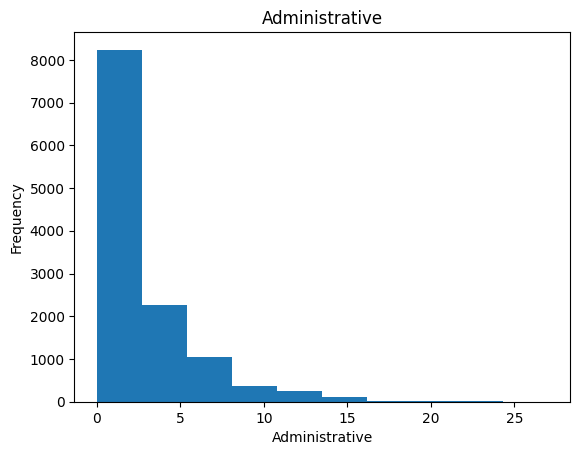

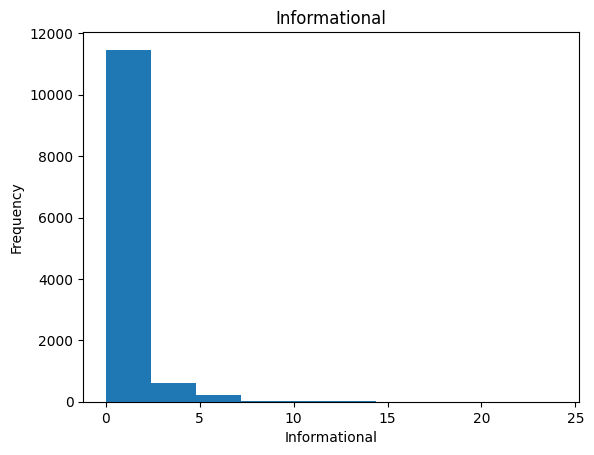

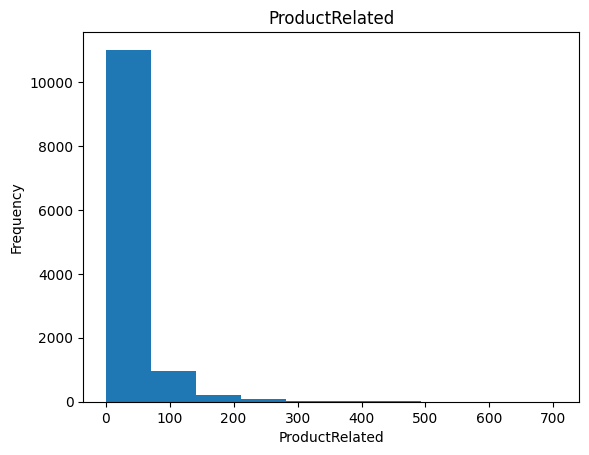

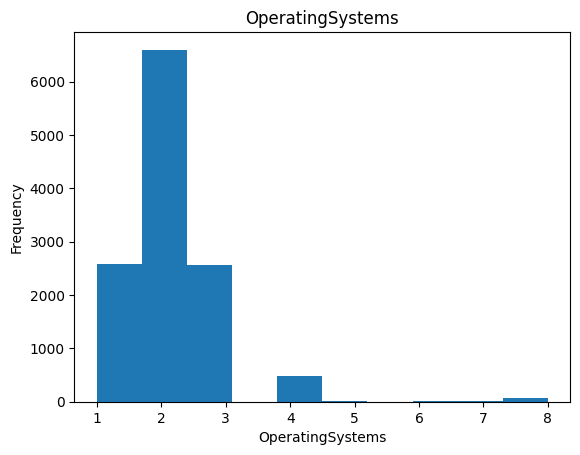

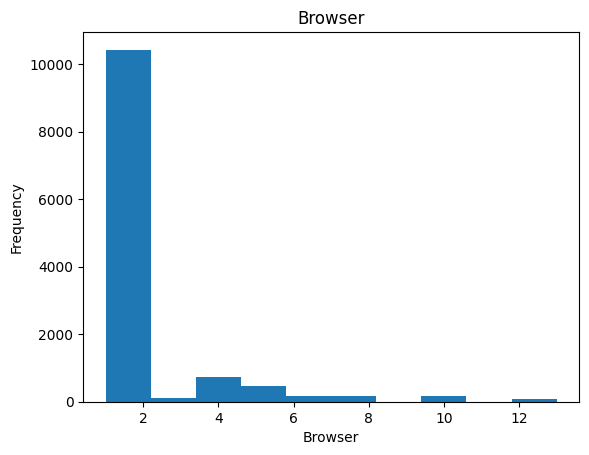

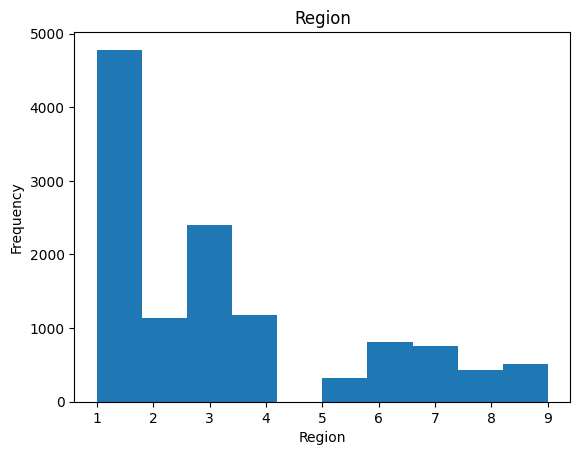

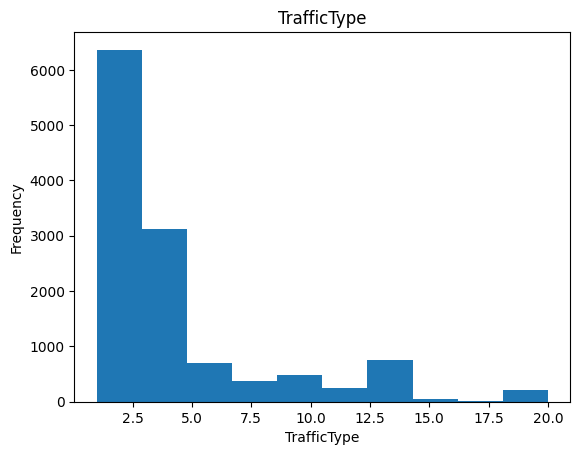

In [5]:
for col in X.columns:
    if pd.api.types.is_integer_dtype(X[col]):
        plt.figure()
        X[col].plot(kind='hist', title=col)
        plt.xlabel(col)
        plt.show()


In [32]:
# Prep data with one-hot encoding and scaling

X_encoded = pd.get_dummies(X, drop_first=True, dtype=int)

scaler = sk.preprocessing.StandardScaler().fit(X_encoded)
X_scaled = scaler.fit_transform(X_encoded)

In [39]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logreg = sk.linear_model.LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
mse = sk.metrics.mean_squared_error(y_test, y_pred)
accuracy = sk.metrics.accuracy_score(y_test, y_pred.round())
auc = sk.metrics.roc_auc_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Accuracy:", accuracy)
print("AUC:", auc)

Mean Squared Error: 0.12692619626926196
Accuracy: 0.8730738037307381
AUC: 0.6649635036496351


In [40]:
kf = sk.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = sk.model_selection.cross_validate(logreg, X_scaled, y, cv=kf, scoring=['accuracy', 'roc_auc'])
print("Cross-validated Accuracy:", cv_results['test_accuracy'])
print("Cross-validated AUC:", cv_results['test_roc_auc'])

Cross-validated Accuracy: [0.8730738  0.89375507 0.88402271 0.88848337 0.88767234]
Cross-validated AUC: [0.89020074 0.89030194 0.89808768 0.89977882 0.89261112]


In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use for integer labels
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 5. Evaluate the model (optional)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# 6. Make predictions (optional)
predictions = model.predict(X_test)

Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8724 - loss: 0.3119 - val_accuracy: 0.8710 - val_loss: 0.2924
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8724 - loss: 0.3119 - val_accuracy: 0.8710 - val_loss: 0.2924
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8980 - loss: 0.2524 - val_accuracy: 0.8796 - val_loss: 0.2716
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8980 - loss: 0.2524 - val_accuracy: 0.8796 - val_loss: 0.2716
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9001 - loss: 0.2370 - val_accuracy: 0.8824 - val_loss: 0.2708
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9001 - loss: 0.2370 - val_accuracy: 0.8824 - val_loss: 0.2708
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9064 - loss: 0.2285 - val_accuracy: 0.8848 - val_loss: 0.2610
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9064 - loss: 0.2285 - val_accuracy: 0.